In [1]:
from gp_2D import *

In [2]:
input_file = '../training_results/2D/train_inputs.json'
var_file = '../training_results/2D/train_outputs_var.json'
output_file = '../training_results/2D/train_outputs_mean.json'
output_type = 'P'


In [3]:
gp = LPI_GP_2D(input_file=input_file, output_file=output_file,\
               output_type=output_type, var_file=var_file, train_frac = 0.2)


In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l1 =  0.3419951893353397 l2 =  1.327465766240115 var =  0.3419951893353397


In [6]:
gp.optimise_GP()

l1 =  7.847599703514611 l2 =  69.51927961775606 var =  0.2782559402207124


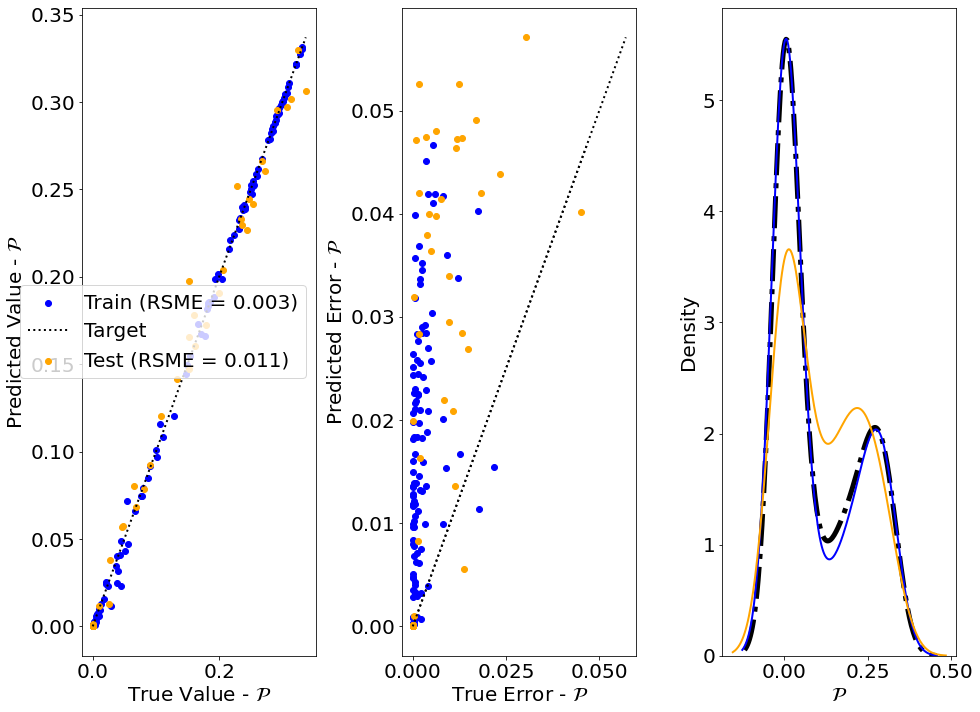

In [7]:
gp.test_train_plot()

In [8]:
N = 100
Ln_300 = np.ones(N)*300e-6
Ln_500 = np.ones(N)*500e-6
Ln_1000 = np.ones(N)*1000e-6
I = np.geomspace(1e14, 1.0e16, N)
X_300 = []
X_500 = []
X_1000 = []
for i in range(N):
        X_300.append([I[i], Ln_300[i]])
        X_500.append([I[i], Ln_500[i]])
        X_1000.append([I[i], Ln_1000[i]])

X_300 = np.array(X_300)
X_500 = np.array(X_500)
X_1000 = np.array(X_1000)

In [9]:
Y_300, Var_epi_300, Var_noise_300 = gp.GP_predict(X_300, get_var=True)
Y_500, Var_epi_500, Var_noise_500 = gp.GP_predict(X_500, get_var=True)
Y_1000, Var_epi_1000, Var_noise_1000 = gp.GP_predict(X_1000, get_var=True)

In [10]:
err_300 = 2.0*np.sqrt(Var_epi_300 + Var_noise_300)
err_500 = 2.0*np.sqrt(Var_epi_500 + Var_noise_500)
err_1000 = 2.0*np.sqrt(Var_epi_300 + Var_noise_1000)

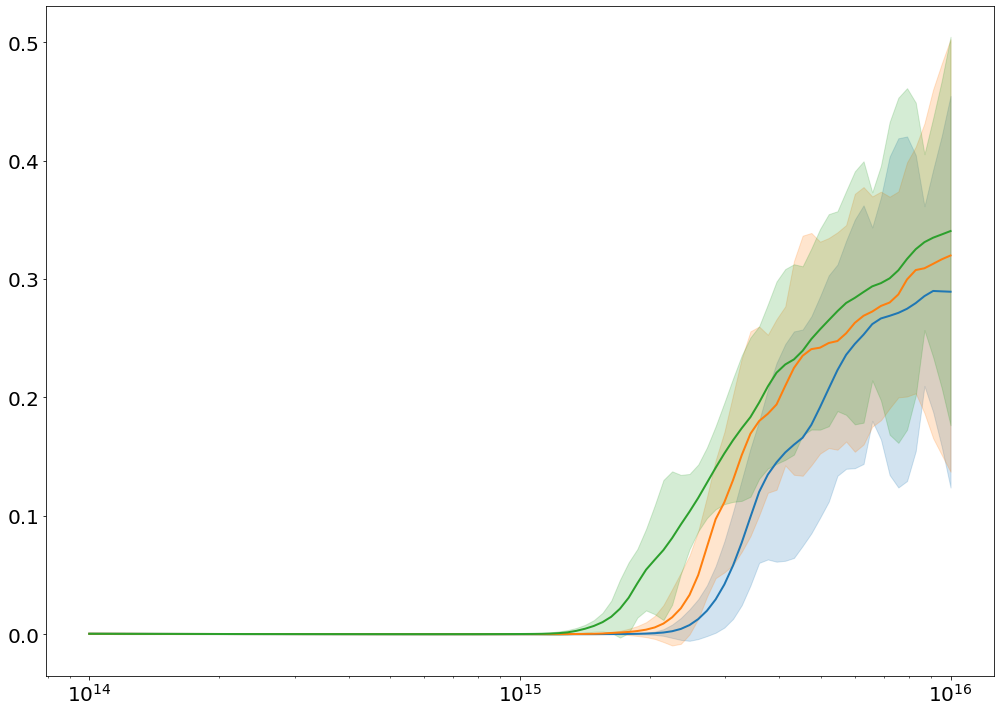

In [11]:
plt.semilogx(X_300[:,0].flatten(), Y_300.flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten(), color = 'C2')

# plt.axhline(y = 1e-4)
plt.fill_between(X_300[:,0].flatten(), Y_300-err_300, Y_300+err_300, alpha = 0.2, color = 'C0')
plt.fill_between(X_500[:,0].flatten(), Y_500.flatten()-err_500, Y_500.flatten()+err_500, alpha = 0.2, color = 'C1')
plt.fill_between(X_1000[:,0].flatten(), Y_1000.flatten()-err_1000, Y_1000.flatten()+err_1000, alpha = 0.2, color = 'C2')

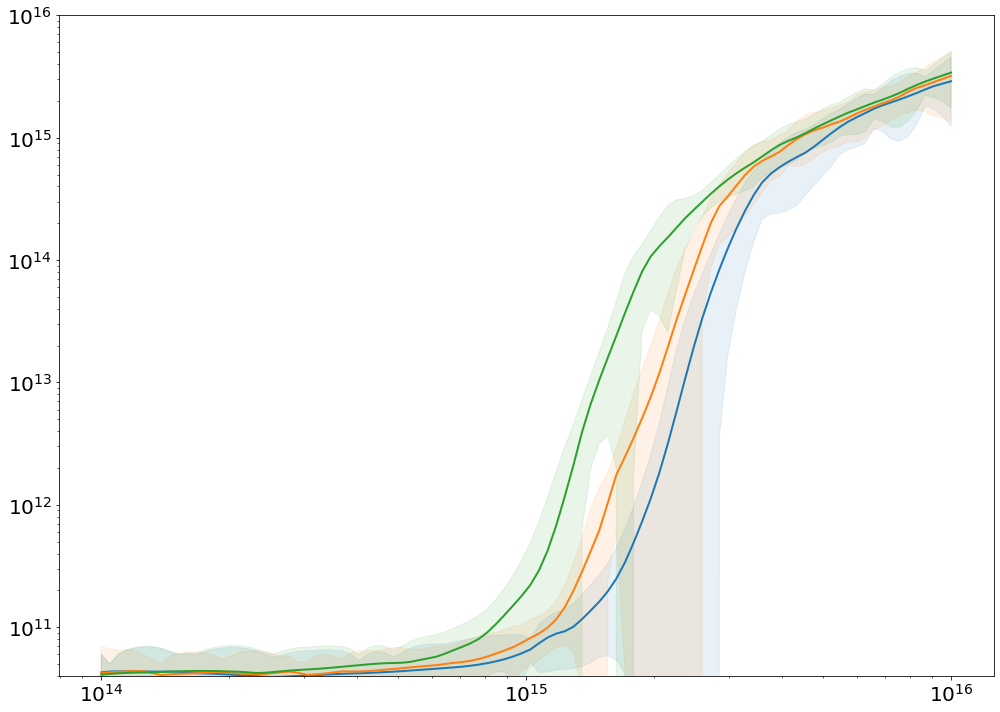

In [12]:
plt.loglog(X_300[:,0].flatten(), Y_300.flatten()*X_300[:,0].flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten()*X_500[:,0].flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten()*X_1000[:,0].flatten(), color = 'C2')

plt.ylim(4e10, 1e16)
plt.fill_between(X_300[:,0].flatten(), (Y_300-err_300)*X_300[:,0].flatten(), (Y_300+err_300)*X_300[:,0].flatten(), alpha = 0.1, color = 'C0')
plt.fill_between(X_500[:,0].flatten(), (Y_500.flatten()-err_500)*X_500[:,0].flatten(), (Y_500.flatten()+err_500)*X_500[:,0].flatten(), alpha = 0.1, color = 'C1')
plt.fill_between(X_1000[:,0].flatten(), (Y_1000.flatten()-err_1000)*X_1000[:,0].flatten(), (Y_1000.flatten()+err_1000)*X_1000[:,0].flatten(), alpha = 0.1, color = 'C2')

In [13]:
N = 128
M = 128
I = np.geomspace(1e14, 1e16, N)
Ln = np.geomspace(300e-6, 1000e-6, M)
X = []

for i in range(N):
    for j in range(M):
        X.append([I[i], Ln[j]])
X = np.array(X)

output = gp.GP_predict(X)

In [14]:
I_plot, Ln_plot = np.meshgrid(I, Ln)

output = output.reshape(I_plot.shape).T
output.max()

0.34060647043993514

In [15]:
from matplotlib.colors import LogNorm
if output_type == 'T':
    plt.contourf(I_plot, Ln_plot, output, levels = np.linspace(4.5, 23, 1000), cmap=plt.cm.inferno)
    plt.yscale('log')
    plt.xscale('log')
    plt.colorbar()

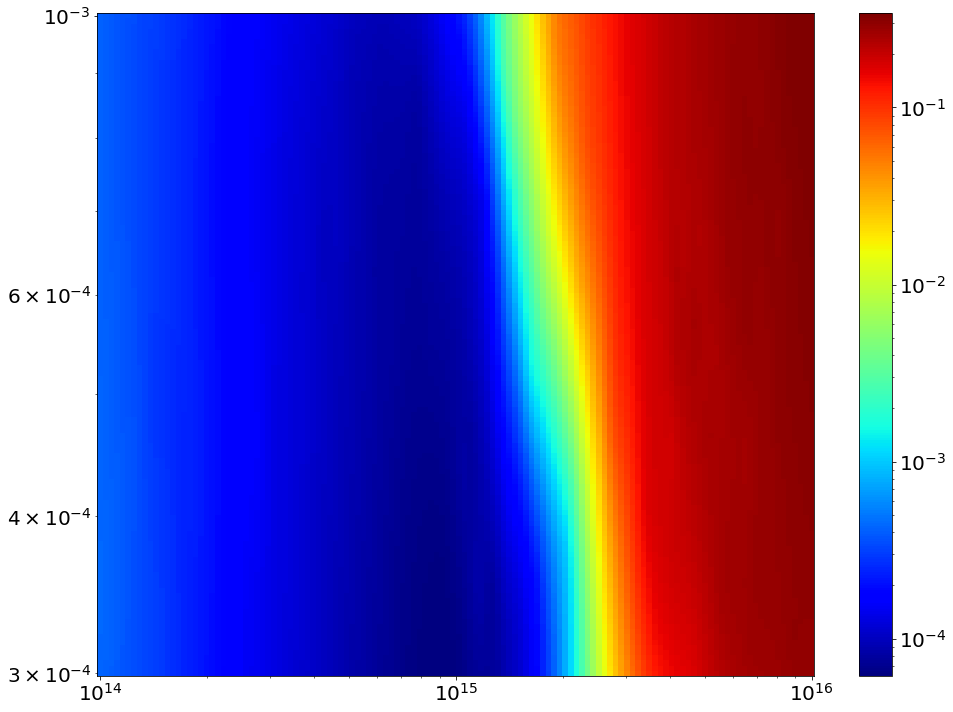

In [16]:
plt.pcolormesh(I_plot, Ln_plot, output, norm = LogNorm(vmin = output.min(), vmax = output.max()), cmap=plt.cm.jet,  shading ='auto')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

 /usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


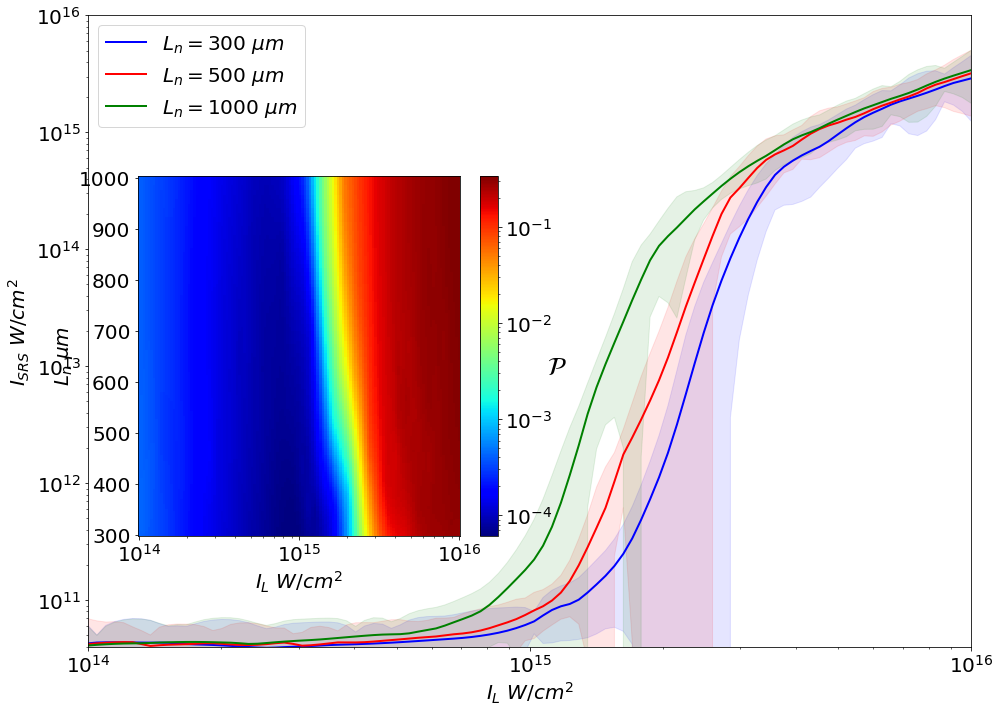

In [17]:
fig, ax1 = plt.subplots()

ax1.loglog(X_300[:,0].flatten(), Y_300.flatten()*X_300[:,0].flatten(), color = 'blue', label = r'$L_n = 300 \,\, \mu m$')
ax1.plot(X_500[:,0].flatten(), Y_500.flatten()*X_500[:,0].flatten(), color = 'red', label = r'$L_n = 500 \,\, \mu m$')
ax1.plot(X_1000[:,0].flatten(), Y_1000.flatten()*X_1000[:,0].flatten(), color = 'green', label = r'$L_n = 1000 \,\, \mu m$')

ax1.set_ylim(4e10, 1e16)
ax1.fill_between(X_300[:,0].flatten(), (Y_300-err_300)*X_300[:,0].flatten(), (Y_300+err_300)*X_300[:,0].flatten(), alpha = 0.1, color = 'blue')
ax1.fill_between(X_500[:,0].flatten(), (Y_500.flatten()-err_500)*X_500[:,0].flatten(), (Y_500.flatten()+err_500)*X_500[:,0].flatten(), alpha = 0.1, color = 'red')
ax1.fill_between(X_1000[:,0].flatten(), (Y_1000.flatten()-err_1000)*X_1000[:,0].flatten(), (Y_1000.flatten()+err_1000)*X_1000[:,0].flatten(), alpha = 0.1, color = 'green')
ax1.set_xlabel(r'$I_{L} \,\, W/cm^2$')
ax1.set_ylabel(r'$I_{SRS} \,\, W/cm^2$')
ax1.legend(loc = 'best')
ax1.set_xlim(1e14, 1e16)
l, b, h, w = .14, .25, .5, .4
ax2 = fig.add_axes([l, b, w, h])

c = ax2.pcolormesh(I_plot, Ln_plot*1e6, output, norm = LogNorm(vmin = output.min(), vmax = output.max()), cmap=plt.cm.jet,  shading ='auto')

ax2.set_xscale('log')
ax2.set_ylabel(r'$L_n \,\, \mu m$')
ax2.set_xlabel(r'$I_{L} \,\, W/cm^2$')
cbar = fig.colorbar(c, ax=ax2)
cbar.set_label(r'$\mathcal{P}$', x = 0.0, y = 0.5, rotation=0, fontsize=25)

In [18]:
N = 5000
I = np.geomspace(1e14, 1e16, N)
Ln = np.geomspace(300e-6, 1000e-6, 20)
I_thr = []

for i in range(len(Ln)):
    X = []
    for j in range(len(I)):
        X.append([I[j], Ln[i]]) 
    X = np.array(X)
    output = gp.GP_predict(X) * I
    idx = np.where(np.abs(np.diff(output))/(output.max()) > 1e-6)
    I_thr.append(I[idx[0][0] - 1])

TypeError: unhashable type: 'numpy.ndarray'

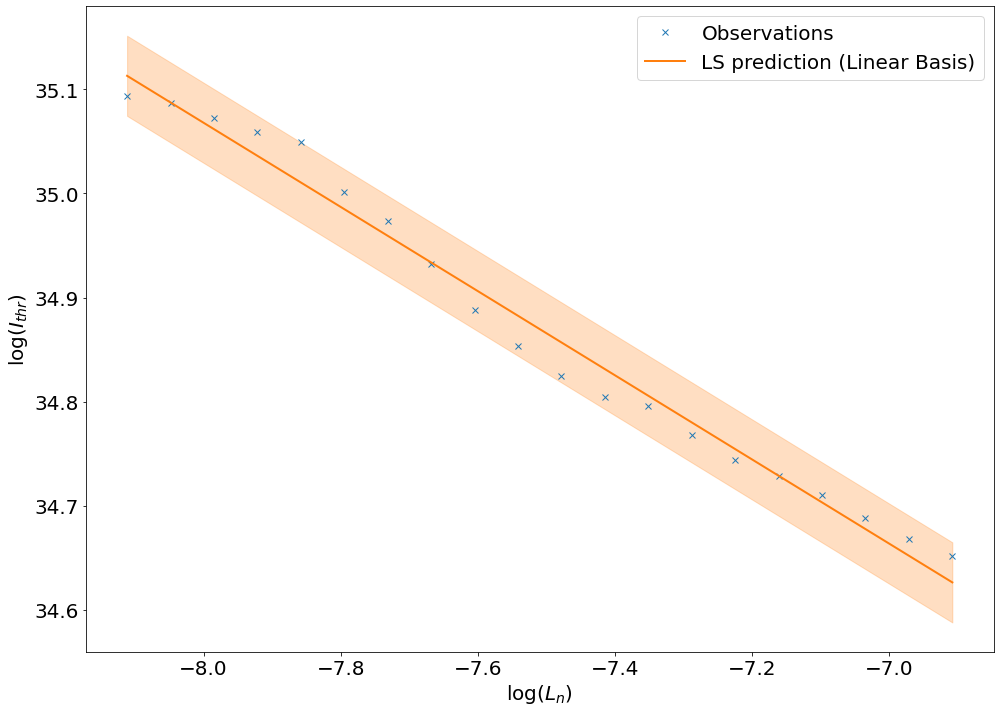

In [20]:
from Linear_Reg import *
fig, ax1 = plt.subplots()
Linear_Regression_fit(X = np.log(Ln), Y = np.log(I_thr), basis = 'linear', plot = True, ax = ax1)


weights =  [31.83584547 -0.40399854]
sigma =  [0.01923971]


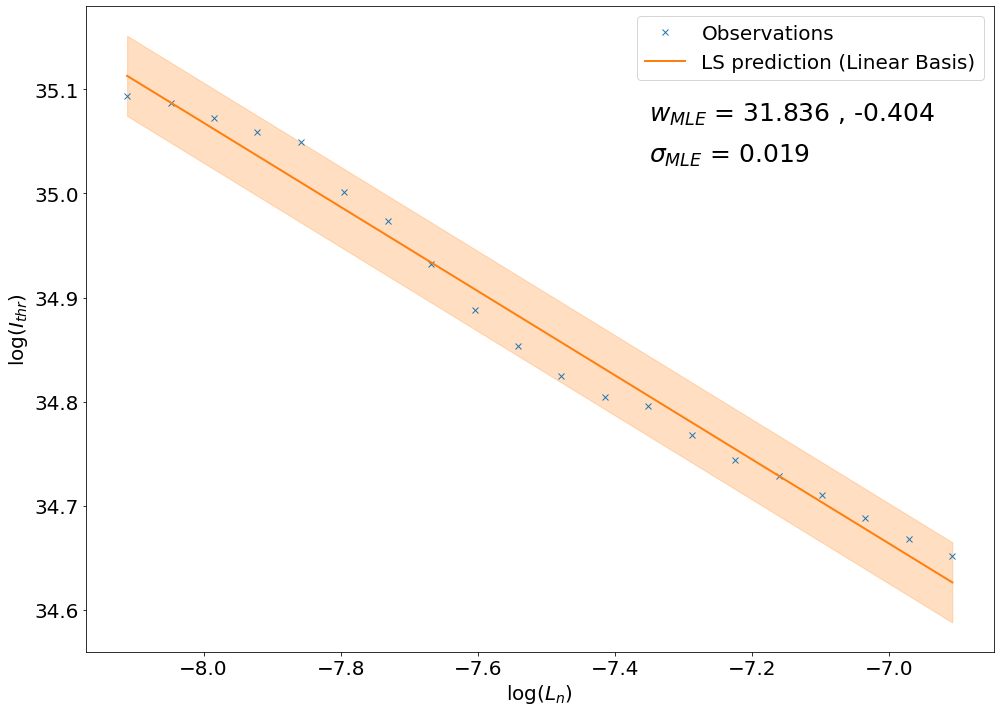

In [43]:
fig, ax1 = plt.subplots()
Linear_Regression_fit(X = np.log(Ln), Y = np.log(I_thr), basis = 'linear', plot = True, ax = ax1)